In [1]:
%pip install -e ../

Obtaining file:///home/jovyan/exoplanet_TA_testing
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of exoplanet_lecture_utils==0.0.1 from file:///home/jovyan/exoplanet_TA_testing (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for exoplanet_lecture_utils
Note: you may need to restart the kernel to use updated packages.


# EXTRASOLAR PLANETS - EXERCISE 1.1


First we need to fetch the data from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/) and store them in a nice format (eg. pandas dataframe).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import exoplanet_lecture_utils as elu

#
# TIP: if this doesn't work try restarting the kernel (you can ignore the warning about celerite)
#

/opt/conda/lib/python3.11/site-packages/radvel/gp.py:32: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  warnings.warn("celerite not installed. GP kernals using celerite will not work. \


In [2]:
# get data
pnasa = elu.get_exoplanet_data()

#
# TIPS:
#
# pnasa in the above command is a pandas dataframe
#
# list(pnasa.columns.values) will print the column headers
# 'pl_orbsmax' is separation from the host star in units AU
# 'pl_bmassj' is planet mass in units of jupiter masses
# 'pl_orbper' is orbital period
# 'pl_rvamp' is Rv semi-amplitude in m/s
# 'pl_orbeccen' is orbital eccentricity
#
# list(pnasa["column_header"].unique()) will print all unique values of a column - try finding all the different discovery methods that have been used to assemble the database
#
# pnasa.loc[pnasa["column_header"]==X] will return planets whose value in the column with header "column_header" is equal to X 
#
#

list(pnasa.columns.values)

['Unnamed: 0',
 'pl_name',
 'hostname',
 'pl_letter',
 'discoverymethod',
 'pl_orbsmax',
 'pl_bmassj',
 'pl_orbper',
 'pl_rvamp',
 'pl_orbeccen']

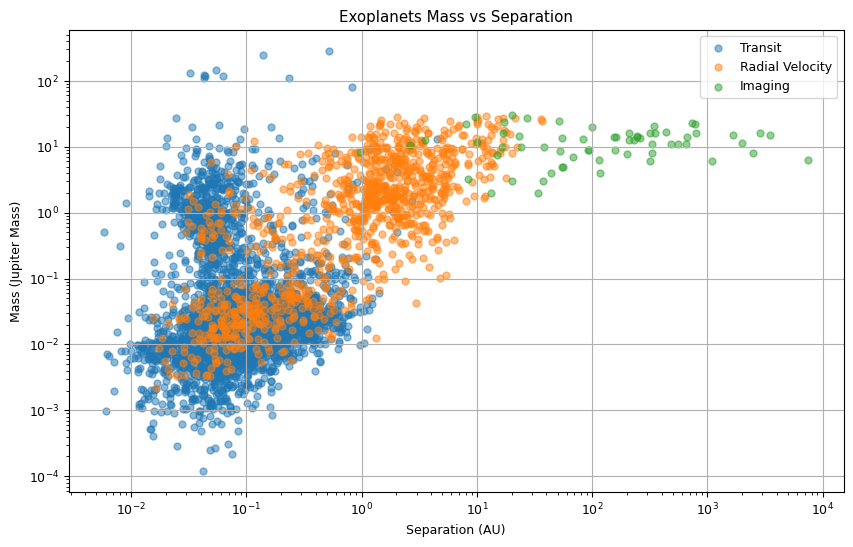

In [3]:
plt.figure(figsize=(10, 6))
for method in ['Transit','Radial Velocity','Imaging']:
    planets = pnasa.loc[pnasa["discoverymethod"]==method]
    plt.scatter(planets['pl_orbsmax'], planets['pl_bmassj'], alpha=0.5, label=method)

plt.legend()
plt.title("Exoplanets Mass vs Separation")
plt.ylabel("Mass (Jupiter Mass)")
plt.xlabel("Separation (AU)")
plt.yscale("log")
plt.xscale("log")
plt.grid(True)

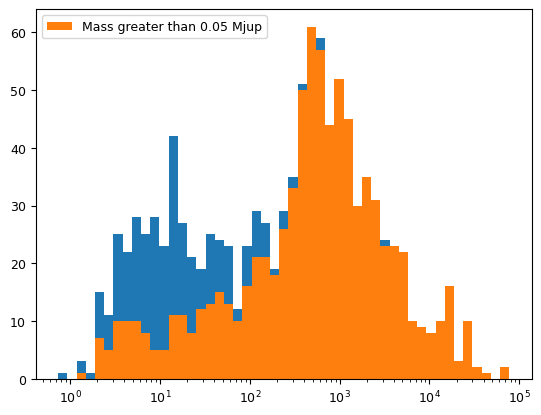

In [4]:
plt.figure()
rv_orb_data = pnasa.loc[pnasa.discoverymethod=="Radial Velocity"].pl_orbper
bins = np.logspace(np.log10(min(rv_orb_data)),np.log10(max(rv_orb_data)),50)
plt.hist(rv_orb_data, bins=bins)
plt.xscale('log')

# compare by mass bin?
rv_data = pnasa.loc[pnasa.discoverymethod=="Radial Velocity"]
mass_cut = 0.05
rv_mass_cut = rv_data.loc[rv_data["pl_bmassj"] >= mass_cut]
plt.hist(rv_mass_cut.pl_orbper, bins=bins,label='Mass greater than %.2f Mjup'%(mass_cut))
plt.legend()

In [6]:
#
# TIP: remove the NaNs - after selecting the Radial Velocity orbital period data, try converting the data to a numpy array and using data = data[~np.isnan(data)]
#

data = pnasa.loc[pnasa.discoverymethod=="Radial Velocity"].pl_orbper.to_numpy()

# check for NaN values
data = data[~np.isnan(data)]

print("Quantiles")
print(f"50%: {np.quantile(data, 0.5):.1f}, 90%: {np.quantile(data, 0.9):.1f}")

Quantiles
50%: 351.4, 90%: 3835.8


Quantiles
50%: 26.5, 90%: 161.7
Minima/Maxima
0.35 m/s 6114.0 m/s


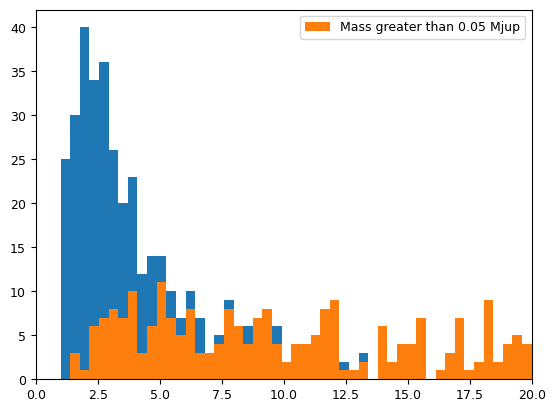

In [9]:
plt.figure()

bins=np.linspace(1,20,50)
rv_data = pnasa.loc[pnasa.discoverymethod=="Radial Velocity"]
plt.hist(rv_data.pl_rvamp, bins=bins)
plt.xlim(0,20)

# compare by mass bin?
mass_cut = 0.05
rv_mass_cut = rv_data.loc[rv_data["pl_bmassj"] >= mass_cut]
plt.hist(rv_mass_cut.pl_rvamp, bins=bins,label='Mass greater than %.2f Mjup'%(mass_cut))
plt.legend()

# quantiles
data = pnasa.loc[pnasa.discoverymethod=="Radial Velocity"].pl_rvamp.to_numpy()
# check for NaN values
data = data[~np.isnan(data)]
print("Quantiles")
print(f"50%: {np.quantile(data, 0.5):.1f}, 90%: {np.quantile(data, 0.9):.1f}")
print("Minima/Maxima")
print(np.min(data), "m/s", np.max(data), "m/s")

Quantiles
35%: 0.10095, 50%: 0.16, 90%: 0.5179000000000002


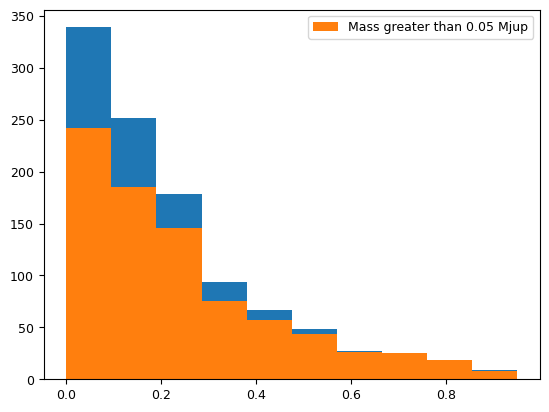

In [11]:
plt.figure()
plt.hist(pnasa.loc[pnasa.discoverymethod=="Radial Velocity"].pl_orbeccen)

# compare by mass bin?
rv_data = pnasa.loc[pnasa.discoverymethod=="Radial Velocity"]
mass_cut = 0.05
rv_mass_cut = rv_data.loc[rv_data["pl_bmassj"] >= mass_cut]
plt.hist(rv_mass_cut.pl_orbeccen,label='Mass greater than %.2f Mjup'%(mass_cut))
plt.legend()

# quantiles
data = pnasa.loc[pnasa.discoverymethod=="Radial Velocity"].pl_orbeccen.to_numpy()
# check for NaN values
data = data[~np.isnan(data)]
print("Quantiles")
print(f"35%: {np.quantile(data, 0.35)}, 50%: {np.quantile(data, 0.5)}, 90%: {np.quantile(data, 0.9)}")


# EXTRASOLAR PLANETS - EXERCISE 1.2

## 1.2.1 HD 41004 Bb

This is an example for how to use the provided two-body-problem code to simulate the motion of a planet around a star provided in the file `two_body_problem.py`.
We simulate the planet HD 41004 Bb according to `https://exoplanetarchive.ipac.caltech.edu/overview/HD%2041004%20B%20b#planet_HD-41004-B-b_collapsible`.

In [12]:
import sys
from copy import deepcopy

import math
import numpy as np
import exoplanet_lecture_utils as elu
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
system = {
    'mass_star': 419, #880,  # in jupiter masses
    'mass_planet': 18.37,  # in jupiter masses
    'period': 1.33,  # days
    'eccentricity': 0.08,
    'inclination': 90., # deg
    'v0': np.array((41.70e3, -8.18e3, 1.75e3))  # km/s
}

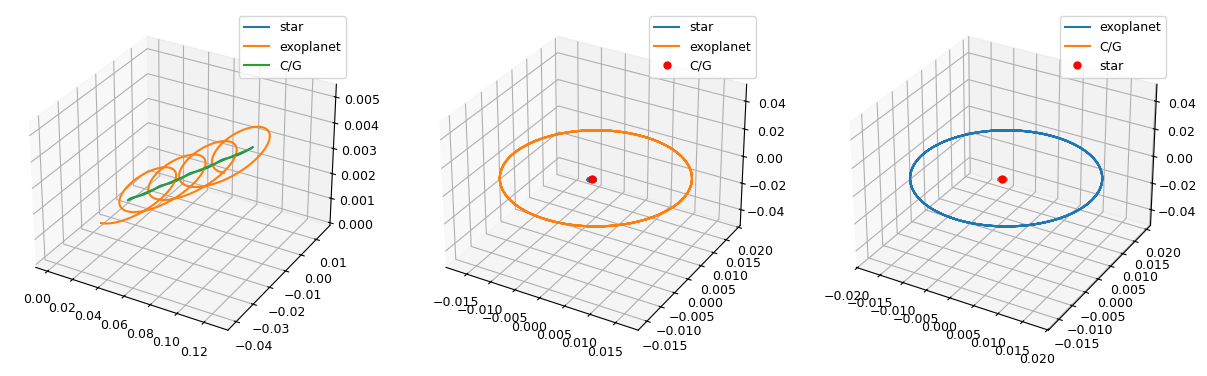

In [14]:
%matplotlib inline
two_body = elu.TwoBodyProblem(m_p=system['mass_planet'],
                              m_s=system['mass_star'],
                              period=system['period'],
                              eccentricity=system['eccentricity'],
                              inclination=system['inclination'],
                              v0=system['v0'])

time, r_star, v_star, r_pl, v_pl = two_body.get_orbit(t_min=0,
                      t_max=system['period']*4,
                      num_points=10000)

two_body.plot_orbit()

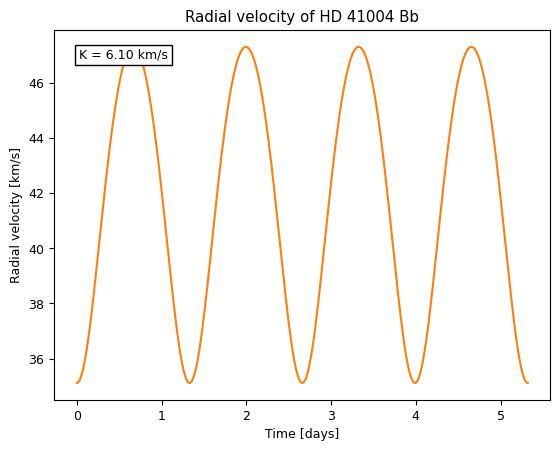

In [15]:
rv = v_star[:, 0]  # radial velocity in m/s
plt.plot(time/(24*60*60), rv/1e3, color='tab:orange')
plt.xlabel('Time [days]')
plt.ylabel('Radial velocity [km/s]')
plt.title('Radial velocity of HD 41004 Bb')

plt.text(0.05, 0.95, f'K = {(np.max(rv)-np.min(rv))/2e3:.2f} km/s', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(boxstyle="square",
                   fc='white',
                   ))

plt.show()

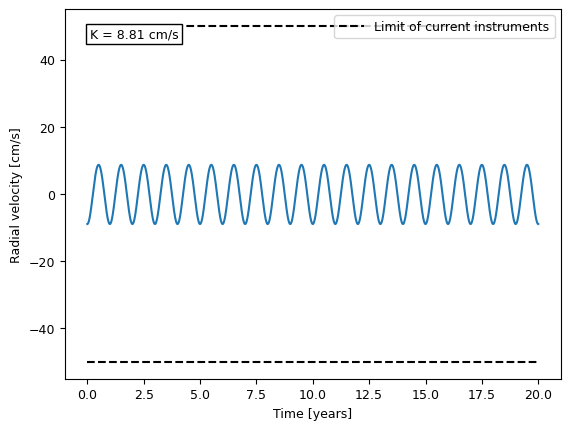

In [16]:
# earth twin

system = {
        'mass_star': 1048,  # in jupiter masses
        'mass_planet': 0.0031,  # in jupiter masses
        'period': 365.25,  # days
        'eccentricity': 0.017,
        'inclination': 90.,  # deg
        'v0': np.array((0, 0, 0))  # km/s
}

%matplotlib inline
two_body = elu.TwoBodyProblem(m_p=system['mass_planet'],
                              m_s=system['mass_star'],
                              period=system['period'],
                              eccentricity=system['eccentricity'],
                              inclination=system['inclination'],
                              v0=system['v0'])

time, r_star, v_star, r_pl, v_pl = two_body.get_orbit(t_min=0,
                      t_max=system['period']*20,
                      num_points=10000)

rv = v_star[:, 0]  # radial velocity in m/s
plt.plot(time/(365.25*24*60*60), rv*100)#, color='tab:orange')
    
plt.xlabel('Time [years]')
plt.ylabel('Radial velocity [cm/s]')

plt.hlines([50, -50], np.min(time/(365.25*24*60*60)), np.max(time/(365.25*24*60*60)), linestyles='dashed', colors='k', label='Limit of current instruments')

plt.text(0.05, 0.95, f'K = {(np.max(rv)-np.min(rv))*50:.2f} cm/s', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(boxstyle="square",
                   fc='white',
                   ))
plt.legend()

plt.show()

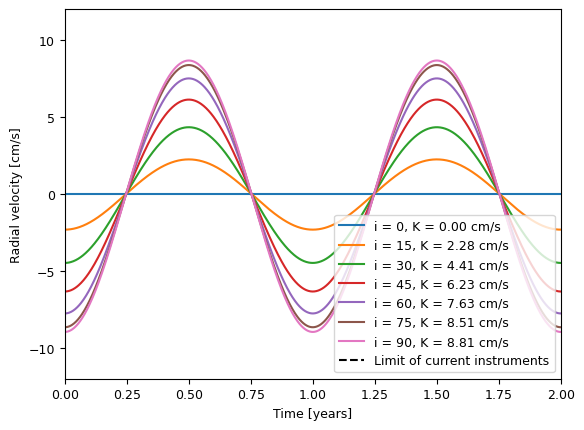

In [22]:
system = {
        'mass_star': 1048,  # in jupiter masses
        'mass_planet': 0.0031,  # in jupiter masses
        'period': 365.25,  # days
        'eccentricity': 0.017,
        'inclination': 90.,  # deg
        'v0': np.array((0, 0, 0))  # km/s
}

# effect of inclination
for incl in [0, 15, 30, 45, 60, 75, 90]:
    %matplotlib inline
    two_body = elu.TwoBodyProblem(m_p=system['mass_planet'],
                              m_s=system['mass_star'],
                              period=system['period'],
                              eccentricity=system['eccentricity'],
                              inclination=incl, #system['inclination'],
                              v0=system['v0'])

    time, r_star, v_star, r_pl, v_pl = two_body.get_orbit(t_min=0,
                      t_max=system['period']*20,
                      num_points=10000)

    rv = v_star[:, 0]  # radial velocity in m/s
    Kamp =  (np.max(rv)-np.min(rv))*50
    plt.plot(time/(365.25*24*60*60), rv*100, label='i = %i, K = %.2f cm/s'%(incl,Kamp))
    
plt.xlabel('Time [years]')
plt.ylabel('Radial velocity [cm/s]')

plt.hlines([50, -50], np.min(time/(365.25*24*60*60)), np.max(time/(365.25*24*60*60)), linestyles='dashed', colors='k', label='Limit of current instruments')


plt.ylim(-12,12)
plt.xlim(0,2)

plt.legend()

plt.show()

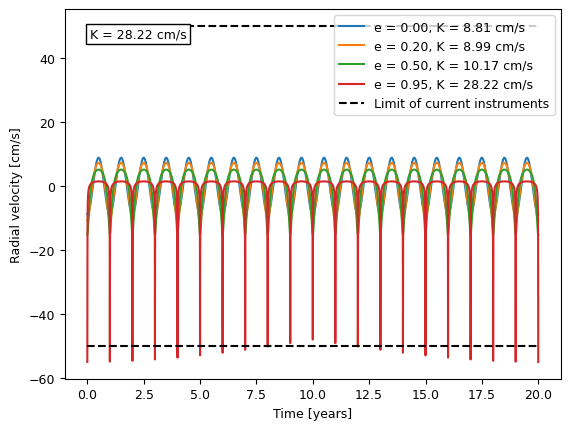

In [23]:
system = {
        'mass_star': 1048,  # in jupiter masses
        'mass_planet': 0.0031,  # in jupiter masses
        'period': 365.25,  # days
        'eccentricity': 0.017,
        'inclination': 90.,  # deg
        'v0': np.array((0, 0, 0))  # km/s
}

# effect of eccentricity
for ecc in [0, 0.2, 0.5, 0.95]:
    %matplotlib inline
    two_body = elu.TwoBodyProblem(m_p=system['mass_planet'],
                              m_s=system['mass_star'],
                              period=system['period'],
                              eccentricity=ecc, #system['eccentricity'],
                              inclination=system['inclination'],
                              v0=system['v0'])

    time, r_star, v_star, r_pl, v_pl = two_body.get_orbit(t_min=0,
                      t_max=system['period']*20,
                      num_points=10000)

    rv = v_star[:, 0]  # radial velocity in m/s
    Kamp =  (np.max(rv)-np.min(rv))*50
    plt.plot(time/(365.25*24*60*60), rv*100, label='e = %.2f, K = %.2f cm/s'%(ecc, Kamp))#, color='tab:orange')
    
plt.xlabel('Time [years]')
plt.ylabel('Radial velocity [cm/s]')

plt.hlines([50, -50], np.min(time/(365.25*24*60*60)), np.max(time/(365.25*24*60*60)), linestyles='dashed', colors='k', label='Limit of current instruments')

plt.text(0.05, 0.95, f'K = {(np.max(rv)-np.min(rv))*50:.2f} cm/s', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(boxstyle="square",
                   fc='white',
                   ))
plt.legend()

plt.show()

## 1.2.3 51 Pegasi b

Importing the 51 Pegasi b data from the file `51Peg_b.csv`.

In [24]:
peg_b = pd.read_csv('https://share.phys.ethz.ch/~ipa/exoplanet_lecture_FS24/51peg.csv')

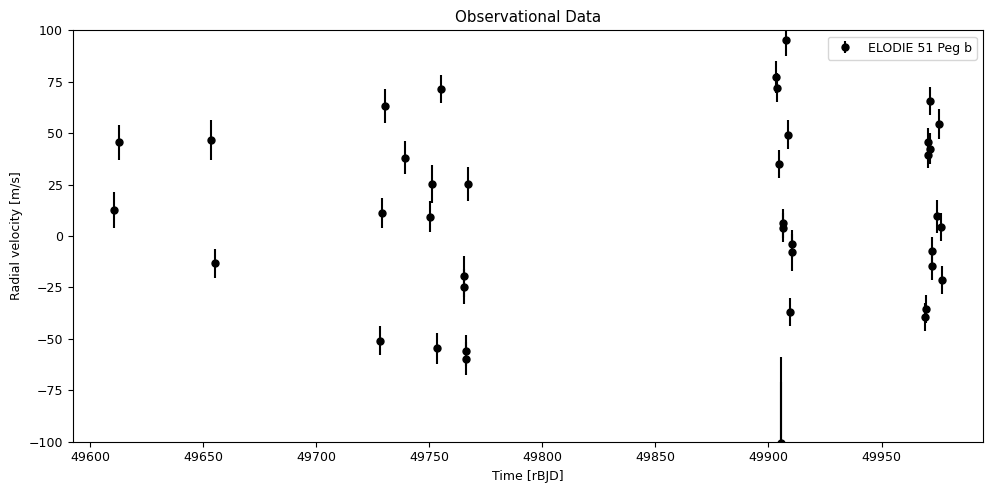

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(x=peg_b['Time [rBJD]'], y=peg_b['deltaRV [m/s]'], yerr=peg_b['deltaRV_error [m/s]'], fmt='ko', label='ELODIE 51 Peg b')

ax.set_xlabel('Time [rBJD]')
ax.set_ylabel('Radial velocity [m/s]')
ax.set_title('Observational Data')
ax.set_ylim(-100, 100)
ax.legend()

plt.tight_layout()
plt.show()

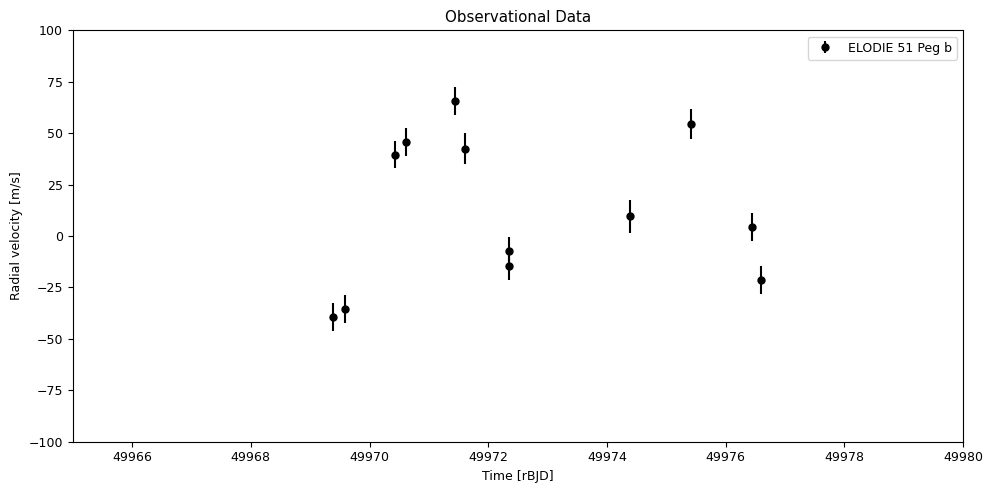

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(x=peg_b['Time [rBJD]'], y=peg_b['deltaRV [m/s]'], yerr=peg_b['deltaRV_error [m/s]'], fmt='ko', label='ELODIE 51 Peg b')

ax.set_xlabel('Time [rBJD]')
ax.set_ylabel('Radial velocity [m/s]')
ax.set_title('Observational Data')
ax.set_xlim(49965, 49980)
ax.set_ylim(-100, 100)
ax.legend()

plt.tight_layout()
plt.show()

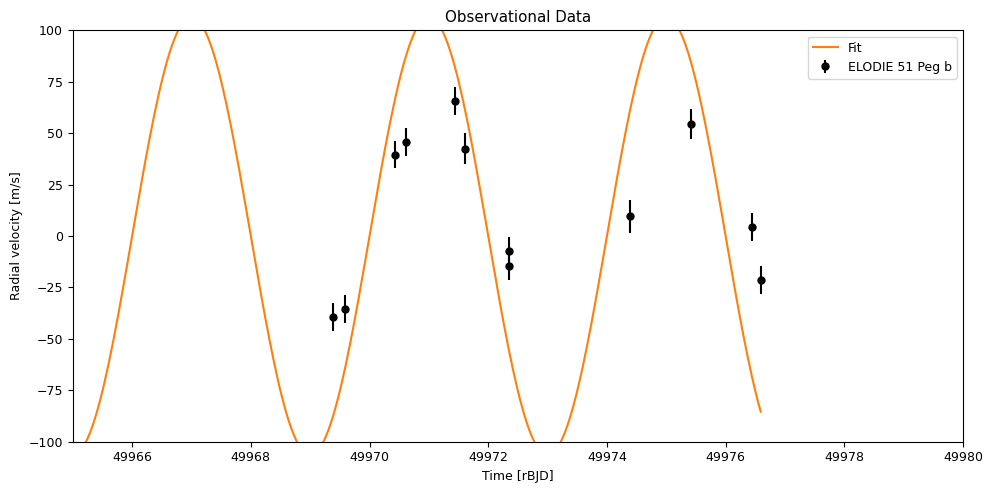

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(x=peg_b['Time [rBJD]'], y=peg_b['deltaRV [m/s]'], yerr=peg_b['deltaRV_error [m/s]'], fmt='ko', label='ELODIE 51 Peg b')

# try a sine fit?
def sine_fit(t, P, delta, K, v0):
    vfit = v0 + K*np.sin(2*math.pi/P * t + delta)
    return vfit

t = np.linspace(np.min(peg_b['Time [rBJD]']),np.max(peg_b['Time [rBJD]']), 10000)
rv_fit = sine_fit(t, 4, math.pi, 0.5*(np.max(peg_b['deltaRV [m/s]'])-np.min(peg_b['deltaRV [m/s]'])), 0)#np.mean(peg_b['deltaRV [m/s]']))
ax.plot(t, rv_fit, color='tab:orange', label='Fit')

ax.set_xlabel('Time [rBJD]')
ax.set_ylabel('Radial velocity [m/s]')
ax.set_title('Observational Data')
ax.set_xlim(49965, 49980)
#ax.set_xlim(49725, 49775)
ax.set_ylim(-100, 100)
ax.legend()

plt.tight_layout()
plt.show()

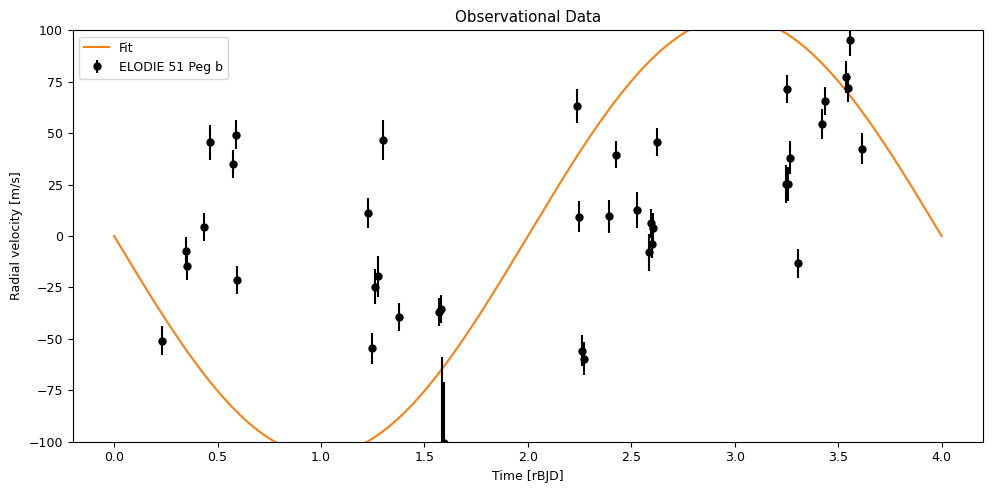

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

def sine_fit(t, P, delta, K, v0):
    vfit = v0 + K*np.sin(2*math.pi/P * t + delta)
    return vfit

P = 4
t = np.linspace(0,P,1000)
delta = math.pi
#delta = 3*math.pi/2
K = 0.5*(np.max(peg_b['deltaRV [m/s]'])-np.min(peg_b['deltaRV [m/s]']))
v0 = 0 #np.mean(peg_b['deltaRV [m/s]'])
rv_fit = sine_fit(t, P, delta, K, v0)
ax.plot(t, rv_fit, color='tab:orange', label='Fit')

# Folding the data will help to see if we have a good guess of the Period or not
ax.errorbar(x=peg_b['Time [rBJD]'] % P, y=peg_b['deltaRV [m/s]'], yerr=peg_b['deltaRV_error [m/s]'], fmt='ko', label='ELODIE 51 Peg b')

ax.set_xlabel('Time [rBJD]')
ax.set_ylabel('Radial velocity [m/s]')
ax.set_title('Observational Data')
ax.set_ylim(-100, 100)
ax.legend()

plt.tight_layout()
plt.show()

In [38]:
import time
start_time = time.time()

# Use the sine fitting procedure with a reduced chi squared test to estimate goodness-of-fit
def sine_fit(t, P, delta, K, v0):
    vfit = v0 + K*np.sin(2*math.pi/P * t + delta)
    return vfit

Ntot = len(peg_b['Time [rBJD]'])

v0 = 0

P_range = np.linspace(3,5,100)
K_range = np.linspace(25,75,100)
delta_range = np.linspace(0,2*math.pi, 100)

fit_params = []
chi_list = []

for P in P_range:
    for K in K_range:
        for delta in delta_range:

            # sine fit
            rv_fit = sine_fit(peg_b['Time [rBJD]'], P, delta, K, v0)

            # reduced chi squared
            chi_sq = 1/(Ntot) * sum([(rv_fit[i]-peg_b['deltaRV [m/s]'][i])**2/(peg_b['deltaRV_error [m/s]'][i]**2) for i in range(Ntot)])
            
            chi_list.append(chi_sq)
            fit_params.append([P, K, delta, v0])
            
print('done')

print("--- %s seconds ---" % (time.time() - start_time))
print("--- %s   mins  ---" % (str((time.time() - start_time)/60)))

index_min = np.argmin(chi_list)
print(fit_params[index_min])


done
--- 677.6567451953888 seconds ---
--- 11.29427990913391   mins  ---
[4.232323232323233, 60.35353535353536, 1.269330365086785, 0]


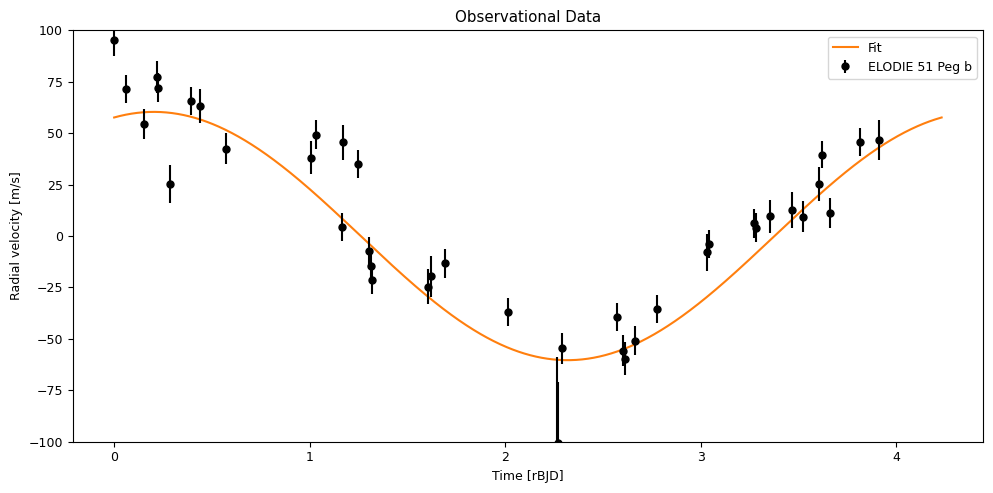

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

def sine_fit(t, P, delta, K, v0):
    vfit = v0 + K*np.sin(2*math.pi/P * t + delta)
    return vfit

# Plot our best fitting model against the phase-folded data
P = fit_params[index_min][0]
t = np.linspace(0,P,1000)
delta = fit_params[index_min][2]
K = fit_params[index_min][1]
v0 = 0

rv_fit = sine_fit(t, P, delta, K, v0)
ax.plot(t, rv_fit, color='tab:orange', label='Fit')

ax.errorbar(x=peg_b['Time [rBJD]'] % P, y=peg_b['deltaRV [m/s]'], yerr=peg_b['deltaRV_error [m/s]'], fmt='ko', label='ELODIE 51 Peg b')

ax.set_xlabel('Time [rBJD]')
ax.set_ylabel('Radial velocity [m/s]')
ax.set_title('Observational Data')
ax.set_ylim(-100, 100)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
def get_msini(period, kamp, ecc, star_mass):
    """
    Calculate the minimum mass of a planet based on the radial velocity amplitude, the period, and the eccentricity.

    Parameters:
    period (float): The period of the planet's orbit in seconds.
    kamp (float): The amplitude of the radial velocity signal in m/s.
    ecc (float): The eccentricity of the planet's orbit.
    star_mass (float): The mass of the star in kg.

    Returns:
    float: The minimum mass of the planet in Jupiter masses.
    """
    return (period / (2*np.pi*6.67e-11))**(1/3) * kamp * np.sqrt(1 - ecc**2) * star_mass**(2/3)

msini = get_msini(4.23*24*60**2, 60, 0, 2.2e30)
print("%.2f Jupiter masses"%(msini/1.898e27))

print("%.1f Earth masses"%(msini/5.972e24))

In [15]:
pegb_sys = {
    'mass_star': 1079.31,  # in jupiter masses
    'mass_planet': 0.5,  # in jupiter masses
    'period': 4.23,  # days
    'semimajor_axis': 5.204,  # AU
    'eccentricity': 0.,
    'inclination': -90.,  # deg
    'v0': np.array((0, 0, 10e3)),  # km/s
    'dt': 2.  # days
}

two_body = elu.TwoBodyProblem(m_p=pegb_sys['mass_planet'],
                              m_s=pegb_sys['mass_star'],
                              period=pegb_sys['period'],
                              eccentricity=pegb_sys['eccentricity'],
                              inclination=pegb_sys['inclination'],
                              v0=pegb_sys['v0'])

time, r_s, v_s, r_p, v_p = two_body.get_orbit(t_min=peg_b['Time [rBJD]'].values[0],
                      t_max=peg_b['Time [rBJD]'].values[-1],
                      num_points=10000)

time /= (24*60*60)  # translate time to days

rv = v_s[:, 0]  # radial velocity in m/s

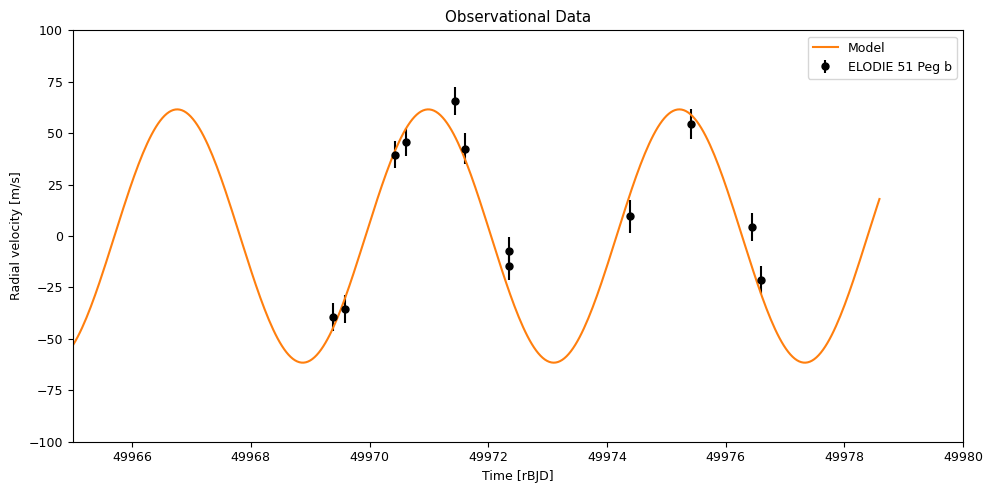

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(x=peg_b['Time [rBJD]'], y=peg_b['deltaRV [m/s]'], yerr=peg_b['deltaRV_error [m/s]'], fmt='ko', label='ELODIE 51 Peg b')
ax.plot(time + pegb_sys['dt'], rv, color='tab:orange', label='Model')

ax.set_xlabel('Time [rBJD]')
ax.set_ylabel('Radial velocity [m/s]')
ax.set_title('Observational Data')
ax.set_xlim(49965, 49980)
#ax.set_xlim(49725, 49775)
ax.set_ylim(-100, 100)
ax.legend()

plt.tight_layout()
plt.show()